In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Infection

In [40]:
#COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/
flow = 'csse'
#flow = "who"


#!cd "COVID-19"
!git clone https://github.com/CSSEGISandData/COVID-19.git 
#!cd COVID-19 && git pull origin master


fatal: destination path 'COVID-19' already exists and is not an empty directory.


## WHO flow
We get WHO data 

In [41]:
if flow == 'who':
    df_corona = pd.read_csv("./who_covid_19_sit_rep_time_series.csv")
#df_corona = pd.read_csv("./COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv")

In [42]:
if flow == 'who':
    df_corona = df_corona.groupby(by="Country/Region").sum()
    df_corona.fillna(0, inplace=True)
    df_corona.index.name = None
    df_corona.columns = pd.to_datetime(df_corona.columns)

## csse flow

In [43]:
if flow == "csse":
    df_corona = pd.read_csv("./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [44]:
if flow == "csse":
    df_corona.drop(['Lat','Long'], axis=1,inplace=True)

In [45]:
if flow == "csse":
    df_corona = df_corona.groupby(by="Country/Region").sum()
    df_corona.fillna(0, inplace=True)
    df_corona.index.name = None
    df_corona.columns = pd.to_datetime(df_corona.columns)
    df_corona.rename(index={'Mainland China':'China'},inplace=True)

In [46]:
df_corona.head(10)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,4,4,5,7,7,7
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33
Algeria,0,0,0,0,0,0,0,0,0,0,...,12,12,17,17,19,20,20,20,24,26
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,1,1,2,8,12,12,17,19,19,31
Armenia,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,4,8
Aruba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Australia,0,0,0,0,4,5,5,6,9,9,...,52,55,60,63,76,91,107,128,128,200
Austria,0,0,0,0,0,0,0,0,0,0,...,29,41,55,79,104,131,182,246,302,504


In [47]:
df_corona.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'Taiwan*', 'Thailand', 'Togo', 'Tunisia', 'Turkey', 'US', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'Vietnam'],
      dtype='object', length=125)

## back to generic 

In [48]:
df_corona.shape

(125, 52)

In [49]:
# Listing all the dates in the columns
dates_list = list(df_corona.columns)

# World population

In [50]:
df_wp_temp = pd.read_excel("./population_world.xlsx", sheet_name = 'ESTIMATES', skiprows= range(0,16))

In [51]:
df_wp_temp.drop(['Index','Variant', 'Notes','Country code', 'Parent code'], inplace=True, axis=1)


In [52]:
df_wp = df_wp_temp[df_wp_temp['Type'] == 'Country/Area']

In [53]:
def retreat(df):
    
    output = df.rename(columns={'Region, subregion, country or area *' : 'Country'})
    output.set_index("Country", inplace=True)
    output.rename(index={'Republic of Korea' : 'South Korea', 'Iran (Islamic Republic of)': 'Iran', 'United States of America' : 'US'}, inplace=True)
    output.sort_values(by='2020', ascending=False, inplace=True)
    return output
#df_wp.drop('index', axis=1, inplace=True)


In [54]:
df_wp =retreat(df_wp)

In [55]:
#df_wp.head(30)

## Population density

In [56]:
df_dens_temp = pd.read_excel("./WPP2019_POP_F06_POPULATION_DENSITY.xlsx", sheet_name = 'ESTIMATES', skiprows= range(0,16))

In [57]:
df_dens_temp = df_dens_temp[df_dens_temp['Type'] == 'Country/Area']

In [58]:
df_dens_temp = retreat(df_dens_temp)

In [59]:
df_dens_temp

,Index,Variant,Notes,Country code,Type,Parent code,1950,1951,1952,1953,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Monaco,281,Estimates,NaN,492,Country/Area,926,13422.8,13009.4,12806.7,12784.6,...,24177.9,24469.1,24764.4,25047,25317.4,25550.3,25766.4,25961.1,26152.3,26338.3
"China, Macao SAR",130,Estimates,11,446,Country/Area,906,6571,6705.35,6731.37,6665.28,...,18422.5,18864.1,19310,19739.5,20136.9,20495.8,20822,21124.8,21419.6,21717.1
Singapore,144,Estimates,NaN,702,Country/Area,920,1460.14,1525.42,1599.9,1682.26,...,7519.49,7670.67,7791.05,7893.75,7988.78,8076.61,8154.35,8225,8291.92,8357.63
"China, Hong Kong SAR",129,Estimates,10,344,Country/Area,906,1880,1959.75,2047.71,2143.54,...,6672.95,6711.28,6751.22,6794.92,6843.8,6898.61,6958.4,7020.69,7082.05,7139.99
Gibraltar,262,Estimates,14,292,Country/Area,925,2203.2,2228.7,2248.9,2263.2,...,3360.8,3365.3,3369.4,3372.6,3374.2,3373.8,3372.3,3371.5,3370.6,3369.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Namibia,61,Estimates,NaN,516,Country/Area,913,0.624783,0.636426,0.648815,0.661857,...,2.61961,2.66586,2.7129,2.76139,2.81177,2.86417,2.91832,2.9738,3.02995,3.0863
Western Sahara,89,Estimates,NaN,732,Country/Area,912,0.0517406,0.0603534,0.0660714,0.0704023,...,1.83329,1.86381,1.89796,1.93603,1.97824,2.02535,2.07751,2.13307,2.18969,2.2456
Mongolia,134,Estimates,NaN,496,Country/Area,906,0.502201,0.510786,0.520046,0.529795,...,1.78323,1.81821,1.85495,1.8925,1.93004,1.96733,2.00429,2.04061,2.07598,2.11018


In [60]:
df_dens = df_dens_temp['2020']

In [61]:
df_dens['US']

36.1853557615153

# Calculation of infection ratio per population
Enrichment of data with population figures from UN
End results is *df_corona_ratio*
We filter on countries that have been actually infected getting top *number_countries* at date

In [62]:
number_countries = 15

In [63]:
df_corona = df_corona.join(df_wp['2020'], how="left")

In [64]:
df_corona.rename(columns={'2020': 'population'}, inplace=True)
df_corona.sort_values(by='population', inplace=True, ascending=False)
# we keep the biggest countries
df_corona = df_corona.head(30)
# we keep the max of contamination
df_corona = df_corona.loc[list(df_corona[max(dates_list)].sort_values(ascending=False).head(number_countries).index.values),:]

In [65]:
df_corona.shape

(15, 53)

In [66]:
df_corona.head(30)

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00,population
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80537,80690,80770,80823,80860,80887,80921,80932,80945,1.43932e+06
Italy,0,0,0,0,0,0,0,0,0,2,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,60461.8
Iran,0,0,0,0,0,0,0,0,0,0,...,3513,4747,5823,6566,7161,8042,9000,10075,11364,83993
Spain,0,0,0,0,0,0,0,0,0,0,...,259,400,500,673,1073,1695,2277,2277,5232,46754.8
Germany,0,0,0,0,0,1,4,4,4,5,...,482,670,799,1040,1176,1457,1908,2078,3675,83783.9
France,0,0,2,3,3,3,4,5,5,5,...,380,656,952,1129,1212,1787,2284,2284,3667,65273.5
US,1,1,2,2,5,5,5,5,5,7,...,217,262,402,518,583,959,1281,1663,2179,331003
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,116,164,207,274,322,384,459,459,801,67886
Japan,2,1,2,2,4,4,7,7,11,15,...,360,420,461,502,511,581,639,639,701,126476
Brazil,0,0,0,0,0,0,0,0,0,0,...,4,13,13,20,25,31,38,52,151,212559


In [67]:
# Results per 100 000 pop
df_corona_ratio = df_corona.loc[:,dates_list].div(df_corona['population'],axis='rows')*100

In [68]:
df_corona_ratio

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13
China,0.0380734,0.0446738,0.0639189,0.0976848,0.144165,0.199886,0.382749,0.422907,0.565613,0.681014,...,5.58498,5.59547,5.6061,5.61166,5.61535,5.61792,5.61979,5.62215,5.62292,5.62382
Italy,0,0,0,0,0,0,0,0,0,0.00330787,...,5.10901,6.38089,7.66765,9.73011,12.1978,15.1699,16.7858,20.6114,20.6114,29.2085
Iran,0,0,0,0,0,0,0,0,0,0,...,3.47886,4.18249,5.65166,6.93272,7.81732,8.52572,9.57461,10.7152,11.9951,13.5297
Spain,0,0,0,0,0,0,0,0,0,0,...,0.474818,0.553954,0.855527,1.06941,1.43942,2.29495,3.6253,4.87009,4.87009,11.1903
Germany,0,0,0,0,0,0.00119355,0.00477418,0.00477418,0.00477418,0.00596773,...,0.312709,0.575289,0.799676,0.953643,1.24129,1.40361,1.739,2.27729,2.48019,4.38628
France,0,0,0.00306403,0.00459605,0.00459605,0.00459605,0.00612806,0.00766008,0.00766008,0.00766008,...,0.44122,0.582166,1.005,1.45848,1.72964,1.8568,2.73771,3.49912,3.49912,5.6179
US,0.000302112,0.000302112,0.000604225,0.000604225,0.00151056,0.00151056,0.00151056,0.00151056,0.00151056,0.00211479,...,0.0450147,0.0655584,0.0791534,0.121449,0.156494,0.176132,0.289726,0.387006,0.502413,0.658303
United Kingdom,0,0,0,0,0,0,0,0,0,0.00294612,...,0.126683,0.170875,0.241581,0.304923,0.403618,0.474325,0.565654,0.676133,0.676133,1.17992
Japan,0.00158132,0.000790661,0.00158132,0.00158132,0.00316264,0.00316264,0.00553463,0.00553463,0.00869727,0.0118599,...,0.261709,0.284638,0.332078,0.364495,0.396912,0.404028,0.459374,0.505232,0.505232,0.554253
Brazil,0,0,0,0,0,0,0,0,0,0,...,0.00188183,0.00188183,0.00611594,0.00611594,0.00940913,0.0117614,0.0145842,0.0178774,0.0244637,0.071039


In [69]:
df_corona_ratio.sort_values(by=dates_list[len(dates_list)-1], ascending=False, inplace=True)

## ratio of infected cases per density 

In [70]:
df_corona_density = df_corona.join(df_dens, how="left")
df_corona_density.rename(columns={'2020': 'density'}, inplace=True)

In [71]:
df_corona_density_ratio = df_corona_density.loc[:,dates_list].div(df_corona_density['density'],axis='rows')

In [72]:
df_corona_density_ratio

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13
China,3.57441,4.19407,6.00084,9.17085,13.5345,18.7657,35.9333,39.7034,53.1009,63.9351,...,524.33,525.315,526.313,526.835,527.18,527.422,527.598,527.82,527.891,527.976
Italy,0,0,0,0,0,0,0,0,0,0.00972978,...,15.0276,18.7687,22.5536,28.6201,35.8785,44.6207,49.3737,60.6262,60.6262,85.9139
Iran,0,0,0,0,0,0,0,0,0,0,...,56.655,68.114,92.0402,112.903,127.309,138.846,155.927,174.502,195.345,220.338
Spain,0,0,0,0,0,0,0,0,0,0,...,2.36839,2.76312,4.26737,5.33421,7.17985,11.4472,18.083,24.292,24.292,55.8172
Germany,0,0,0,0,0,0.00416022,0.0166409,0.0166409,0.0166409,0.0208011,...,1.08998,2.00523,2.78735,3.32402,4.32663,4.89242,6.06145,7.93771,8.64495,15.2888
France,0,0,0.0167773,0.025166,0.025166,0.025166,0.0335546,0.0419433,0.0419433,0.0419433,...,2.41593,3.18769,5.50296,7.986,9.47079,10.1671,14.9905,19.1597,19.1597,30.7612
US,0.0276355,0.0276355,0.055271,0.055271,0.138177,0.138177,0.138177,0.138177,0.138177,0.193448,...,4.11769,5.9969,7.2405,11.1095,14.3152,16.1115,26.5024,35.4011,45.9578,60.2177
United Kingdom,0,0,0,0,0,0,0,0,0,0.00712754,...,0.306484,0.413397,0.584458,0.7377,0.976473,1.14753,1.36849,1.63577,1.63577,2.85458
Japan,0.00576479,0.00288239,0.00576479,0.00576479,0.0115296,0.0115296,0.0201768,0.0201768,0.0317063,0.0432359,...,0.954072,1.03766,1.21061,1.32878,1.44696,1.4729,1.67467,1.84185,1.84185,2.02056
Brazil,0,0,0,0,0,0,0,0,0,0,...,0.157286,0.157286,0.511179,0.511179,0.786429,0.983036,1.21896,1.49421,2.04471,5.93754


In [73]:
df_corona_density_ratio.shape

(15, 52)

# Start of the crisis

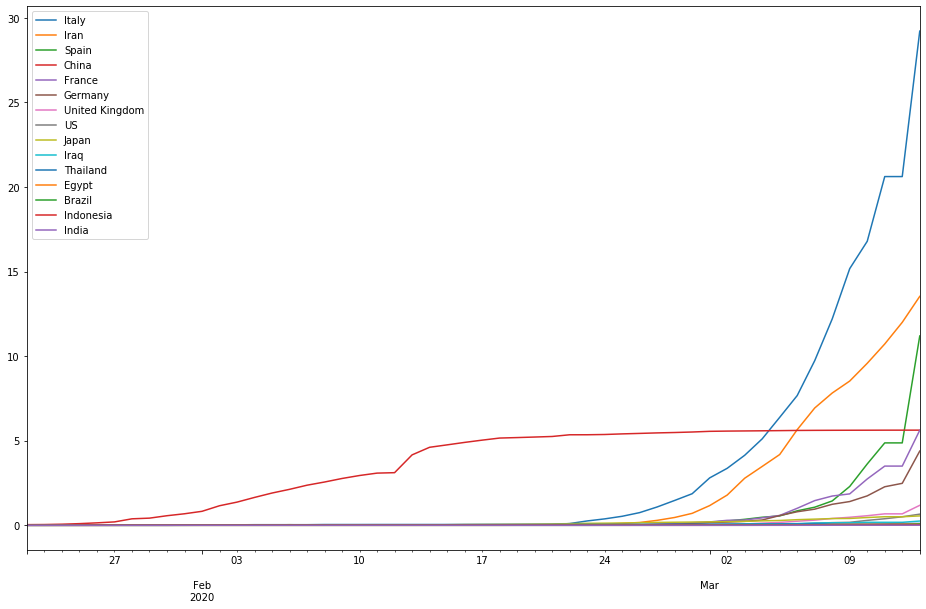

In [74]:
df_corona_ratio.head(15).transpose().plot(figsize=(16,10))

plt.show()

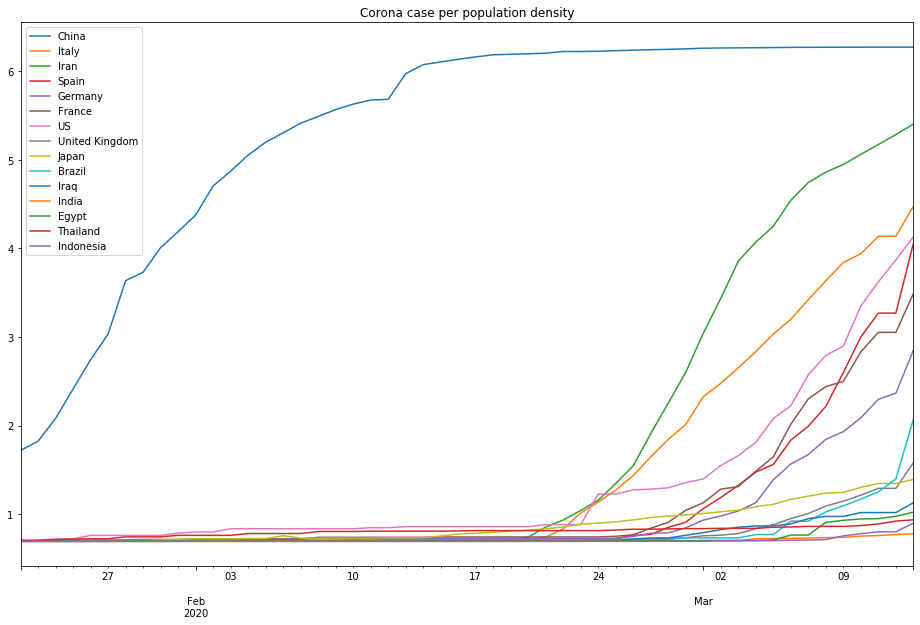

In [75]:
import numpy as np
import matplotlib as mplt
def log_plus_un(x):
    return np.log(x+1)


#np.log((df_corona_density_ratio.transpose()+1).astype(float))
(df_corona_density_ratio.transpose()+1).astype(float).apply(log_plus_un).plot(kind='line', figsize=(16,10))
plt.title('Corona case per population density')
plt.show()

## The starting dates
*serie_crisis_start* is a serie of the start of the crisis (above ratio) per country


In [76]:
ratio_start = 0.5
ratio_start_density = 3.6

In [77]:
df_tmp = df_corona_ratio > ratio_start
df_tmp_dens = df_corona_density_ratio > ratio_start_density

In [78]:
df_tmp = df_tmp.cumsum(axis=1)
df_tmp_dens = df_tmp_dens.cumsum(axis=1)

In [79]:
# look where we start index when we reach 1
serie_crisis_start = (df_tmp == 1).idxmax(axis=1)
serie_crisis_start_dens = (df_tmp_dens == 1).idxmax(axis=1)

In [80]:
df_tmp_dens

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13
China,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
Italy,0,0,0,0,0,0,0,0,0,0,...,6,7,8,9,10,11,12,13,14,15
Iran,0,0,0,0,0,0,0,0,0,0,...,7,8,9,10,11,12,13,14,15,16
Spain,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,3,4,5,6,7,8
Germany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,3,4,5,6
France,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,3,4,5,6,7,8
US,0,0,0,0,0,0,0,0,0,0,...,1,2,3,4,5,6,7,8,9,10
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
# replace first info as 1/1/2020
serie_crisis_start = serie_crisis_start.apply(lambda x: '2099-01-01' if (x == dates_list[0]) else x)
serie_crisis_start =  pd.to_datetime(serie_crisis_start)
# for density
serie_crisis_start_dens = serie_crisis_start_dens.apply(lambda x: '2099-01-01' if (x == dates_list[0]) else x)
serie_crisis_start_dens =  pd.to_datetime(serie_crisis_start_dens)

In [82]:
serie_crisis_start

Italy            2020-02-25
Iran             2020-02-29
Spain            2020-03-05
China            2020-01-30
France           2020-03-05
Germany          2020-03-05
United Kingdom   2020-03-10
US               2020-03-12
Japan            2020-03-11
Iraq             2099-01-01
Thailand         2099-01-01
Egypt            2099-01-01
Brazil           2099-01-01
Indonesia        2099-01-01
India            2099-01-01
dtype: datetime64[ns]

In [83]:
serie_crisis_start_dens

China            2020-01-23
Italy            2020-02-28
Iran             2020-02-27
Spain            2020-03-06
Germany          2020-03-08
France           2020-03-06
US               2020-03-04
United Kingdom   2099-01-01
Japan            2099-01-01
Brazil           2020-03-13
Iraq             2099-01-01
India            2099-01-01
Egypt            2099-01-01
Thailand         2099-01-01
Indonesia        2099-01-01
dtype: datetime64[ns]

## Define a matrix with age of crisis as index

In [84]:
import numpy as np

In [85]:
duration = range(-30,100)
df_corona_ratio.shape[0], len(duration)
np.zeros((df_corona_ratio.shape[0], len(duration)))
df_crisis_age = pd.DataFrame(columns = duration, index=df_corona_ratio.index)
#df_crisis_age = pd.DataFrame(np.empty((df_corona_ratio.shape[0], len(duration))), columns = duration)
#df_crisis_age.set_index(df_corona_ratio.index, inplace=True)
df_crisis_age.shape

(15, 130)

In [86]:
duration = range(-30,100)

df_crisis_age_dens = pd.DataFrame(columns = duration, index=df_corona_density_ratio.index)
#df_crisis_age = pd.DataFrame(np.empty((df_corona_ratio.shape[0], len(duration))), columns = duration)
#df_crisis_age.set_index(df_corona_ratio.index, inplace=True)
df_crisis_age_dens.shape

(15, 130)

## Populate the df_crisis_age

We loop over the dates series and age and populate the *df_crisis_age*

In [87]:
for index, value in serie_crisis_start.iteritems():
    i = 0
    for d in df_corona_ratio.columns.values:
        i = (d - value).days
        if i in duration:
            #print(index, i)
            
            df_crisis_age.loc[index, i] = df_corona_ratio.loc[index, d]
df_crisis_age.index.name = 'Country'
df_crisis_age

,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,...,90,91,92,93,94,95,96,97,98,99
Country,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0.00330787,0.00330787,0.00330787,0.00330787,0.00330787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iran,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,0.00213882,0.00213882,0.00213882,0.00213882,0.00213882,0.00427764,0.00427764,0.00427764,0.00427764,0.00427764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,0.00919209,0.00919209,0.00919209,0.00919209,0.0168522,0.0168522,0.0168522,0.0168522,0.0168522,0.0168522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,0.0143226,0.0143226,0.0143226,0.0155161,0.0155161,0.0167096,0.0167096,0.0190967,0.0190967,0.0190967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,0.00441917,0.0117845,0.0117845,0.0132575,0.0132575,0.0132575,0.0132575,0.0132575,0.0132575,0.0132575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US,0.00362535,0.00362535,0.00392746,0.00392746,0.00392746,0.00392746,0.00392746,0.00392746,0.00392746,0.00392746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Japan,0.0205572,0.0205572,0.0221385,0.0221385,0.0229292,0.0339984,0.046649,0.0521836,0.0585089,0.0664155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
for index, value in serie_crisis_start_dens.iteritems():
    i = 0
    for d in df_corona_density_ratio.columns.values:
        i = (d - value).days
        if i in duration:
            #print(index, i)
            
            df_crisis_age_dens.loc[index, i] = df_corona_density_ratio.loc[index, d]
df_crisis_age_dens.index.name = 'Country'
df_crisis_age_dens

,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,...,90,91,92,93,94,95,96,97,98,99
Country,,,,,,,,,,,,,,,,,,,,,
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Italy,0,0,0.00972978,0.00972978,0.00972978,0.00972978,0.00972978,0.00972978,0.00972978,0.0145947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iran,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,0.0106684,0.0106684,0.0106684,0.0106684,0.0213369,0.0213369,0.0213369,0.0213369,0.0213369,0.0213369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,0.0540829,0.0540829,0.0582431,0.0582431,0.0665636,0.0665636,0.0665636,0.0665636,0.0665636,0.0665636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,0.0503319,0.0503319,0.0503319,0.0922752,0.0922752,0.0922752,0.0922752,0.0922752,0.0922752,0.0922752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US,0.30399,0.30399,0.30399,0.30399,0.30399,0.30399,0.30399,0.30399,0.331626,0.331626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_crisis_age_dens[0]

Country
China             4.19407
Italy             4.32002
Iran              4.75034
Spain             4.26737
Germany           4.32663
France            5.50296
US                4.11769
United Kingdom        NaN
Japan                 NaN
Brazil            5.93754
Iraq                  NaN
India                 NaN
Egypt                 NaN
Thailand              NaN
Indonesia             NaN
Name: 0, dtype: object

# Results

In [90]:
df_crisis_age_plot = df_crisis_age.transpose()

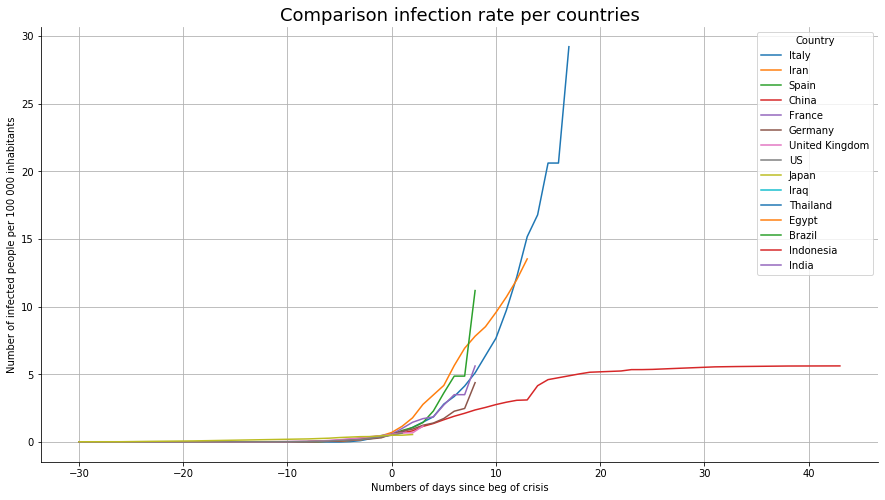

In [91]:

ax = df_crisis_age_plot.plot(figsize=(15,8))
plt.title("Comparison infection rate per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of infected people per 100 000 inhabitants")
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("save.png")
plt.show()



In [92]:
df_crisis_age_dens_plot = df_crisis_age_dens.transpose()

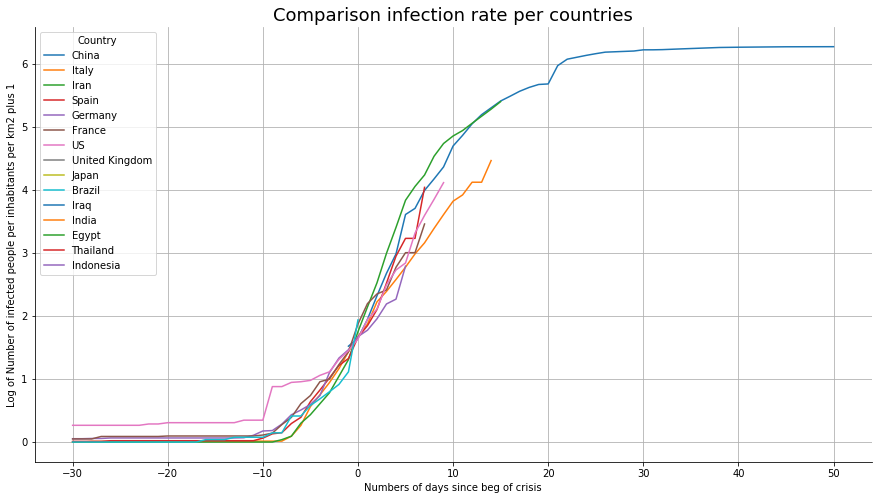

In [93]:
ax = df_crisis_age_dens_plot.astype(float).apply(log_plus_un).plot(figsize=(15,8))
plt.title("Comparison infection rate per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Log of Number of infected people per inhabitants per km2 plus 1")
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("save.png")
plt.show()
